## Charpter 9 Support Vector Machine

In [212]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")#, category=FutureWarning)


dir='/Users/shuya/Documents/DS/MachineLearning/Statistical Learning/Data/'
%matplotlib inline

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Questions 4

4. Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between
the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifier on the training
data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.

In [69]:
np.random.seed(5)
X = np.random.randn(100,1)
y = X**2+X+1+np.random.randn(100,1)

df = pd.DataFrame(np.hstack((X,y)),columns=['X','y'])

df['ind']=9999
df.loc[:50,:]['ind']=3
df.loc[50:,:]['ind']=-3
df['y']=df['y']+df['ind']

print(df.head())

          X          y  ind
0  0.441227   5.428332    3
1 -0.330870   3.949369    3
2  2.430771  10.585679    3
3 -0.252092   4.441755    3
4  0.109610   4.619953    3


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [70]:
train, test = train_test_split(df,train_size = 0.5)

Accuracy score is 0.96


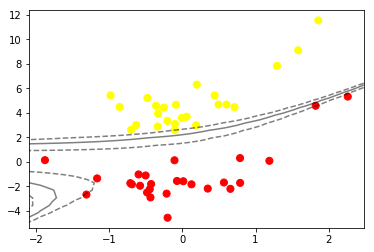

In [71]:
#SVC Polinominal Classifier
svc = SVC(C=1, kernel='poly')
svc.fit(train[['X','y']],train['ind'])
pred = svc.predict(test[['X','y']])
print('Accuracy score is {0}'.format(accuracy_score(pred,test['ind'])))
plt.scatter(train['X'], train['y'], c=train['ind'], s=50, cmap='autumn')
plot_svc_decision_function(svc, ax=None, plot_support=True)

Accuracy score is 0.96


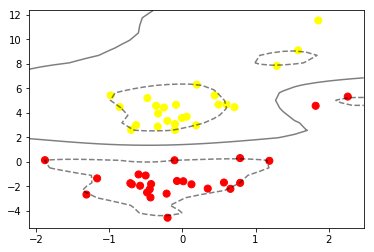

In [72]:
#SVC RBF Classifier
svc = SVC(C=1, kernel='rbf')
svc.fit(train[['X','y']],train['ind'])
pred = svc.predict(test[['X','y']])
print('Accuracy score is {0}'.format(accuracy_score(pred,test['ind'])))
plt.scatter(train['X'], train['y'], c=train['ind'], s=50, cmap='autumn')
plot_svc_decision_function(svc, ax=None, plot_support=True)

5. We have seen that we can fit an SVM with a non-linear kernel in order
to perform classification using a non-linear decision boundary.We will
now see that we can also obtain a non-linear decision boundary by
performing logistic regression using non-linear transformations of the
features.

(a) Generate a data set with n = 500 and p = 2, such that the observations
belong to two classes with a quadratic decision boundary
between them. For instance, you can do this as follows:

In [115]:
x1=np.random.randn(500,1)-0.5
x2=np.random.rand(500,1)-0.5
y=1*(x1**2-x2**2>0)

df=pd.DataFrame(np.hstack((x1,x2,y)),columns=['x1','x2','y'])

(b) Plot the observations, colored according to their class labels.
Your plot should display X1 on the x-axis, and X2 on the yaxis.

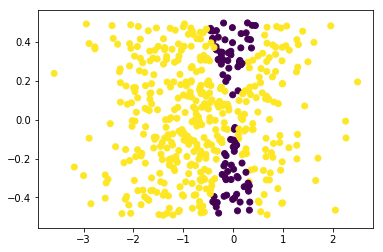

In [116]:
plt.scatter(df['x1'],df['x2'],c=df['y'])
plt.show()

(c) Fit a logistic regression model to the data, using X1 and X2 as
predictors.

In [117]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(fit_intercept = False, C = 1e9)
lr_model.fit(df[['x1','x2']],df['y'])
print(lr_model.coef_)
print(lr_model.score)

[[-1.09080573  0.14443708]]
<bound method ClassifierMixin.score of LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)>


(d) Apply this model to the training data in order to obtain a predicted
class label for each training observation. Plot the observations,
colored according to the predicted class labels. The
decision boundary should be linear.

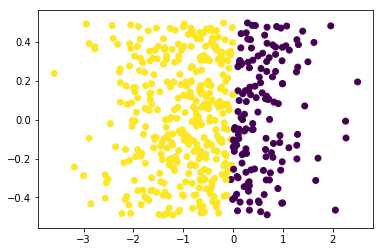

In [118]:
pred = lr_model.predict(df[['x1','x2']])
plt.scatter(df['x1'],df['x2'],c=pred)
plt.show()

(e) Now fit a logistic regression model to the data using non-linear
functions of X1 and X2 as predictors (e.g. X1-square , X1×X2, log(X2),
and so forth).

In [119]:
df['x1-squre']=df['x1']**2
df['x1*x2']=df['x1']*df['x2']
df['x2-squre']=df['x2']**2
df.head()

,x1,x2,y,x1-squre,x1*x2,x2-squre
0,-0.649984,-0.270710,1.0,0.422479,0.175957,0.073284
1,-1.344902,-0.039088,1.0,1.808761,0.052569,0.001528
2,-2.564744,-0.403800,1.0,6.577909,1.035643,0.163054
3,-1.255958,0.168038,1.0,1.577431,-0.211049,0.028237
4,-1.727789,0.053028,1.0,2.985256,-0.091622,0.002812


In [120]:
lr_model=LogisticRegression(fit_intercept = False, C = 1e9)
lr_model.fit(df[['x1','x2','x1-squre','x1*x2','x2-squre']],df['y'])
lr_model.coef_

array([[   38.19122388,    34.95867969,  1264.27769841,  -125.34817577,
        -1376.57591237]])

(f) Apply this model to the training data in order to obtain a predicted
class label for each training observation. Plot the observations,
colored according to the predicted class labels. The
decision boundary should be obviously non-linear. If it is not,
then repeat (a)-(e) until you come up with an example in which
the predicted class labels are obviously non-linear.

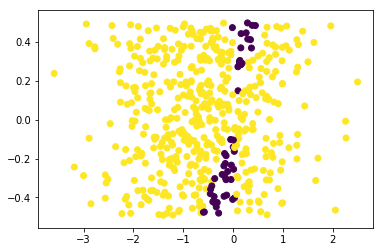

In [121]:
pred = lr_model.predict(df[['x1','x2','x1-squre','x2-squre','x1*x2']])
plt.scatter(df['x1'],df['x2'],c=pred)
plt.show()

(g) Fit a support vector classifier to the data with X1 and X2 as
predictors. Obtain a class prediction for each training observation.
Plot the observations, colored according to the predicted
class labels.


Description: 
***A linear kernel, even with low cost fails to find non-linear decision boundary and classifies all points to a single class.***


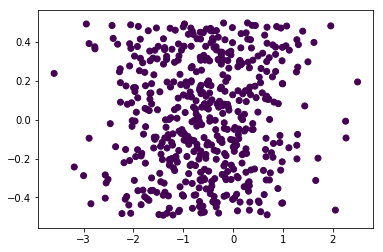

In [128]:
svc = SVC(C=1,kernel='linear',gamma='auto')
svc.fit(df[['x1','x2']],df['y'])
support = svc.support_
pred = svc.predict(df[['x1','x2']])
plt.scatter(df['x1'],df['x2'],c=pred)
plt.show()

(h) Fit a SVM using a non-linear kernel to the data. Obtain a class
prediction for each training observation. Plot the observations,
colored according to the predicted class labels.

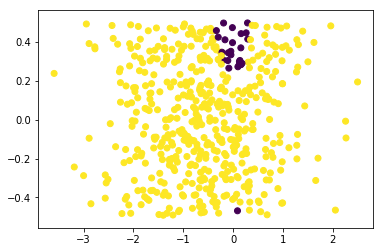

In [126]:
svm = SVC(C=1, kernel='rbf', gamma='auto')
svm.fit(df[['x1','x2']],df['y'])
pred=svm.predict(df[['x1','x2']])
plt.scatter(df['x1'],df['x2'],c=pred)
plt.show()

(i) Comment on your results.


This experiment enforces the idea that SVMs with non-linear kernel are extremely powerful in finding non-linear boundary. Both, logistic regression with non-interactions and SVMs with linear kernels fail to find the decision boundary. Adding interaction terms to logistic regression seems to give them same power as radial-basis kernels. However, there is some manual efforts and tuning involved in picking right interaction terms. This effort can become prohibitive with large number of features. **Radial basis kernels, on the other hand, only require tuning of one parameter - gamma - which can be easily done using cross-validation.**

6. At the end of Section 9.6.1, it is claimed that in the case of data that
is just barely linearly separable, a support vector classifier with a
small value of cost that misclassifies a couple of training observations
may perform better on test data than one with a huge value of cost
that does not misclassify any training observations. You will now
investigate this claim.

(a) Generate two-class data with p = 2 in such away that the classes
are just barely linearly separable.

In [172]:
from scipy.stats import uniform  
x_1 = 100*np.random.rand(500,1)
y_1 = 2*x_1 + 1 + 100*np.random.rand(500,1)
x_0 = 100*np.random.rand(500,1)
y_0 = 2*x_0+ 1 - 100*np.random.rand(500,1)

In [173]:
df1 = pd.DataFrame(np.hstack([x_1,y_1]),columns=['x','y'])
df1['ind'] = 1
df2 = pd.DataFrame(np.hstack([x_0,y_0]),columns=['x','y'])
df2['ind'] = 0
df = pd.concat([df1,df2])
df.head()

,x,y,ind
0,30.180628,80.641928,1
1,55.893757,194.572029,1
2,66.585278,193.235752,1
3,54.459800,206.107963,1
4,0.451437,6.697771,1


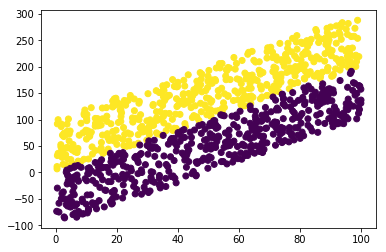

In [174]:
plt.scatter(df['x'],df['y'],c=df['ind'])

(b) Compute the cross-validation error rates for support vector
classifiers with a range of cost values. How many training errors
are misclassified for each value of cost considered, and how
does this relate to the cross-validation errors obtained?

{'C': 10, 'gamma': 1e-05, 'kernel': 'linear'}


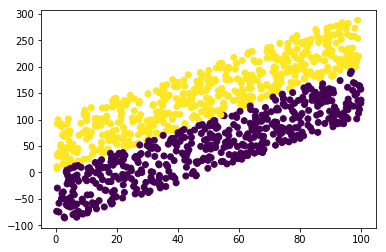

In [189]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

Cs = [1, 10,100]
gammas = [0.00001, 0.001, 0.01, 0.1]
parameters = {'kernel':('linear', 'rbf'), 'C':Cs, 'gamma':gammas}
svc = SVC()
grid_search = GridSearchCV(svc, parameters, cv=5)
grid_search.fit(df[['x','y']], df['ind'])
pred = grid_search.predict(df[['x','y']])
print(grid_search.best_params_)
plt.scatter(df['x'],df['y'],c=pred)
plt.show()

(c) Generate an appropriate test data set, and compute the test
errors corresponding to each of the values of cost considered.
Which value of cost leads to the fewest test errors, and how
does this compare to the values of cost that yield the fewest
training errors and the fewest cross-validation errors?

Accuracy score is 0.988
{'C': 1, 'gamma': 1e-05, 'kernel': 'linear'}


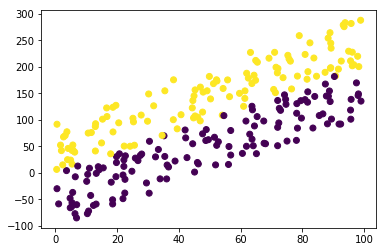

In [194]:
train,test = train_test_split(df)


(d) We again see an overfitting phenomenon for linear kernel. A large cost tries to fit correctly classify noisy-points and hence overfits the train data. A small cost, however, makes a few errors on the noisy test points and performs better on test data.

7. In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
Auto data set.

In [195]:
auto=pd.read_csv(dir+'Auto.csv',index_col='Unnamed: 0')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [196]:
median_mpg = auto['mpg'].median()
print(median_mpg)
auto['mpg_ind'] = [1 if mpg > median_mpg else 0 for mpg in auto['mpg']]
auto.head()

22.75


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_ind
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


(b) Fit a support vector classifier to the data with various values
of cost, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different
values of this parameter. Comment on your results.

In [206]:
train,test = train_test_split(auto.drop(['name','mpg'],axis=1),train_size=0.7)

In [211]:
accu=[]
cost_lst = [0.001, 0.01, 0.1, 1, 10,2100]
for cost in cost_lst:
    svm=SVC(C=cost,kernel='linear')
    svm.fit(train.drop(['mpg_ind'],axis=1),train['mpg_ind'])
    pred=svm.predict(test.drop(['mpg_ind'],axis=1))
    accu.append([cost,accuracy_score(test['mpg_ind'],pred)])
accu = pd.DataFrame(accu)
accu

,0,1
0,0.001,0.906780
1,0.010,0.915254
2,0.100,0.923729
3,1.000,0.906780
4,10.000,0.906780
5,2100.000,0.906780


(c) Now repeat (b), this time using SVMs with radial and polynomial
basis kernels, with different values of gamma and degree and
cost. Comment on your results.

{'C': 10, 'gamma': 1e-05, 'kernel': 'linear'}


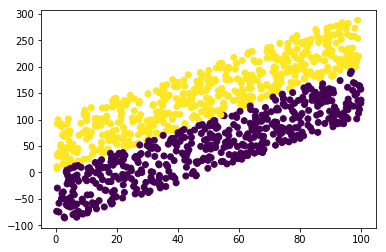

In [213]:
Cs = [1, 10,100]
gammas = [0.00001, 0.001, 0.01, 0.1]
parameters = {'kernel':('linear', 'rbf'), 'C':Cs, 'gamma':gammas}
svc = SVC()
grid_search = GridSearchCV(svc, parameters, cv=5)
grid_search.fit(df[['x','y']], df['ind'])
pred = grid_search.predict(df[['x','y']])
print(grid_search.best_params_)
plt.scatter(df['x'],df['y'],c=pred)
plt.show()

8. This problem involves the OJ data set which is part of the ISLR
package.

(a) Create a training set containing a random sample of 800
observations, and a test set containing the remaining
observations.

In [255]:
oj = pd.read_csv(dir+'OJ.csv',index_col='Unnamed: 0')
oj['Store7'] = oj['Store7'].apply(lambda x: 1 if x =='Yes' else 0)
train = oj.sample(n=800)
test = oj[~oj.index.isin(train.index)]
print(oj.shape, train.shape, test.shape)

(1070, 18) (800, 18) (270, 18)


(b) Fit a support vector classifier to the training data using
cost=0.01, with Purchase as the response and the other variables
as predictors. describe the results obtained.

In [267]:
svc = SVC(C=0.01,kernel='linear',gamma='scale')
svc.fit(train.drop(['Purchase'],axis=1),train['Purchase'])
print('SVM produce {0} support vectors'.format(len(svc.support_)))
df = pd.DataFrame(np.vstack([list(train.drop(['Purchase'],axis=1).columns),svc.coef_[0]])).transpose()
#df

SVM produce 614 support vectors


Part (c): We can produce a table of the predictions on the training data set

In [268]:
pred = svc.predict(train.drop(['Purchase'],axis=1))
print(accuracy_score(train['Purchase'],pred))

0.69375


(d) Use the tune() function to select an optimal cost. Consider values
in the range 0.01 to 10.

In [ ]:
accu=[]
lst = np.linspace(0.01,10,15)

for cost in lst:
    svm = SVC(C=cost,kernel='linear')
    svm.fit(train.drop(['Purchase'],axis=1),train['Purchase'])
    pred = svm.predict(test.drop(['Purchase'],axis=1))
    accu.append([cost,accuracy_score(test['Purchase'],pred)])

accu = pd.DataFrame(accu)  
accu

(e) Compute the training and test error rates using this new value
for cost.

In [283]:
svm = SVC(C=10,kernel='rbf')
svm.fit(train.drop(['Purchase'],axis=1),train['Purchase'])
pred=svm.predict(test.drop(['Purchase'],axis=1))
print(accuracy_score(test['Purchase'],pred))
pred=svm.predict(train.drop(['Purchase'],axis=1))
print(accuracy_score(train['Purchase'],pred))

0.8148148148148148
0.835


(f) Repeat parts (b) through (e) using a support vector machine
with a radial kernel. Use the default value for gamma.
(g) Repeat parts (b) through (e) using a support vector machine
with a polynomial kernel. Set degree=2.
(h) Overall, which approach seems to give the best results on this
data?

https://www.hackerearth.com/blog/developers/simple-tutorial-svm-parameter-tuning-python-r/